## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import re
import nltk
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import plotly.express as px
import string
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image

In [6]:
data = pd.read_csv('jobs.csv')

## EDA - Exploratory Data Analyis

In [7]:
data.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27010 entries, 0 to 27009
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               27010 non-null  int64 
 1   Job Salary               27010 non-null  object
 2   Job Experience Required  27010 non-null  object
 3   Key Skills               27010 non-null  object
 4   Role Category            27010 non-null  object
 5   Functional Area          27010 non-null  object
 6   Industry                 27010 non-null  object
 7   Job Title                27010 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [9]:
data.isna().sum()

Unnamed: 0                 0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  0
dtype: int64

### kullanacağımız sutunları secelim

In [10]:
data.columns

Index(['Unnamed: 0', 'Job Salary', 'Job Experience Required', 'Key Skills',
       'Role Category', 'Functional Area', 'Industry', 'Job Title'],
      dtype='object')

In [11]:
df = data[['Job Title', 'Job Experience Required', 'Key Skills']]
df

,Job Title,Job Experience Required,Key Skills
0,Media Planning Executive/Manager,5 - 10 yrs,Media Planning| Digital Media
1,Sales Executive/Officer,2 - 5 yrs,pre sales| closing| software knowledge| clien...
2,R&D Executive,0 - 1 yrs,Computer science| Fabrication| Quality check|...
3,Technical Support Engineer,0 - 5 yrs,Technical Support
4,Testing Engineer,2 - 5 yrs,manual testing| test engineering| test cases|...
...,...,...,...
27005,Software Developer,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...
27006,Operations Manager,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...
27007,Lecturer/Professor,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching
27008,Software Developer,5 - 10 yrs,Security Analysis| Software Development Life ...


In [12]:
key_skill = data['Key Skills'].tolist()
vect = TfidfVectorizer(stop_words = 'english')
vect_matrix = vect.fit_transform(key_skill)
similarity = cosine_similarity(vect_matrix)
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03346209,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.02080848,
        0.01744164],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03346209, 0.02080848, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.01744164, ..., 0.        , 0.        ,
        1.        ]])

In [13]:
indices = pd.Series(data.index, index = data['Job Title']).drop_duplicates()

In [31]:
def job_recommendation(title, similarity_matrix=similarity, indices=indices):
    index = indices[title]
    scores = list(enumerate(similarity_matrix[index]))
    scores = sorted(scores, key=lambda x: x[::], reverse=True)
    scores = scores[:10]
    job_indices = [i[0] for i in scores]
    recommended_jobs = df.iloc[job_indices]
    return recommended_jobs



In [32]:
job_recommendation('Testing Engineer')

,Job Title,Job Experience Required,Key Skills
401,Social Media Marketing Manager,0 - 1 yrs,website| facebook| online| Twitter| seo| inte...
400,Software Developer,3 - 8 yrs,Salesforce Developer| sfdc developer| Salesforce
399,Production Manager,10 - 15 yrs,Production Management| Weld Shop| Press Shop|...
398,Head/VP/GM/National Manager -Sales,3 - 8 yrs,Equity| Currency| Mutual Funds| Commodities| ...
397,Sales/Business Development Manager,1 - 3 yrs,ERP| RF| Action plan| Relationship| Software s...
396,Outside Technical Consultant,12 - 16 yrs,Com| Application support| Email| SAP IS-Utili...
395,Intern,0 - 2 yrs,biotechnology| microbiology| nursing| biomedi...
394,Head/VP/GM/National Manager -Sales,15 - 20 yrs,Sales Head| Hospitality| Office automation| R...
393,Technical Architect,8 - 12 Years,Product management|Analytical skills|software ...
392,Business Analyst,1 - 4 yrs,electronic trading| structured finance| dcf| ...


In [33]:
job_recommendation('Software Developer')

,Job Title,Job Experience Required,Key Skills
6249,Sales/Business Development Manager,4 - 5 yrs,Networking| Printing| Aerospace| Raw material...
6248,Software Developer,2 - 5 yrs,PHP| MVC| Laravel| AWS| SDLC| Wordpress| LAMP...
6247,Associate/Senior Associate -(NonTechnical),5 - 10 yrs,Data analysis| Investment banking| Financial ...
6246,Software Developer,1 - 6 yrs,Coding| Wordpress| Commerce| HTML| Troublesho...
6245,Associate/Senior Associate -(NonTechnical),1 - 4 yrs,client servicing| client support| background ...
6244,Corporate Communication Executive,2 - 5 yrs,Customer Service| Help Desk| Information| Tel...
6243,Outside Consultant,8 - 13 yrs,dealing| auditing| customer relationship| ser...
6242,Software Developer,4 - 8 yrs,Troubleshooting| Maven| Postgresql| Distributi...
6241,Associate/Senior Associate -(NonTechnical),0 - 3 yrs,Medical| Technical support| Outbound| Antivir...
6240,HR Executive,1 - 3 yrs,Payroll processing| HR Administrator| Employe...


## WordCloud

In [34]:
def wordcloud(data, bgcolor):
    plt.figure(figsize = (10, 10))
    wc = WordCloud(background_color = bgcolor, stopwords = STOPWORDS)   
    wc.generate(' '.join(data)) # butun mesajları birleştirip tek bir text haline getirir.
    plt.imshow(wc)
    plt.axis("off")

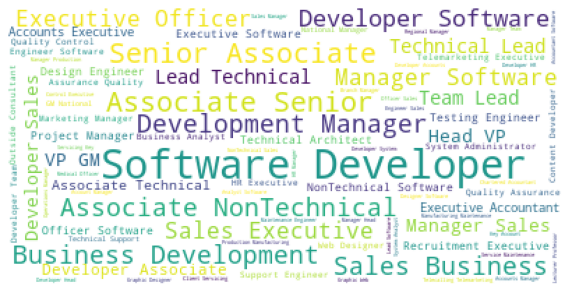

In [35]:
wordcloud(df['Job Title'], 'white')

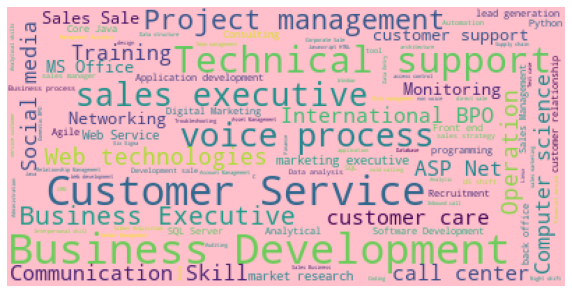

In [37]:
wordcloud(df['Key Skills'], 'pink')

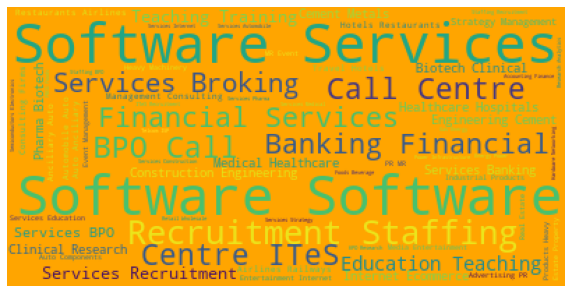

In [39]:
wordcloud(data['Industry'], 'orange')